In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import nltk


In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lalit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lalit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv("case_study_data.csv")

In [4]:
df.head()

,complaint_id,product_group,text
0,2815595,bank_service,On XX/XX/2017 my check # XXXX was debited from...
1,2217937,bank_service,I opened a Bank of the the West account. The a...
2,2657456,bank_service,wells fargo in nj opened a business account wi...
3,1414106,bank_service,A hold was placed on my saving account ( XXXX ...
4,1999158,bank_service,Dear CFPB : I need to send a major concern/com...


In [5]:
# Dataset shape
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (268246, 3)


In [6]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 complaint_id     0
product_group    0
text             0
dtype: int64


In [7]:
# Unique categories in 'product_group'
print("Unique Product Groups:\n", df['product_group'].value_counts())


Unique Product Groups:
 product_group
credit_reporting    81219
debt_collection     61392
mortgage            40275
loan                31006
credit_card         29550
bank_service        20071
money_transfers      4733
Name: count, dtype: int64


In [8]:

# Summary statistics
print(df.describe())

       complaint_id
count  2.682460e+05
mean   2.306764e+06
std    4.910491e+05
min    1.290155e+06
25%    1.907010e+06
50%    2.413670e+06
75%    2.738732e+06
max    2.995824e+06


### Visualizing Complaint Distribution

C:\Users\lalit\AppData\Local\Temp\ipykernel_23300\1821496959.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['product_group'], order=df['product_group'].value_counts().index, palette="viridis")


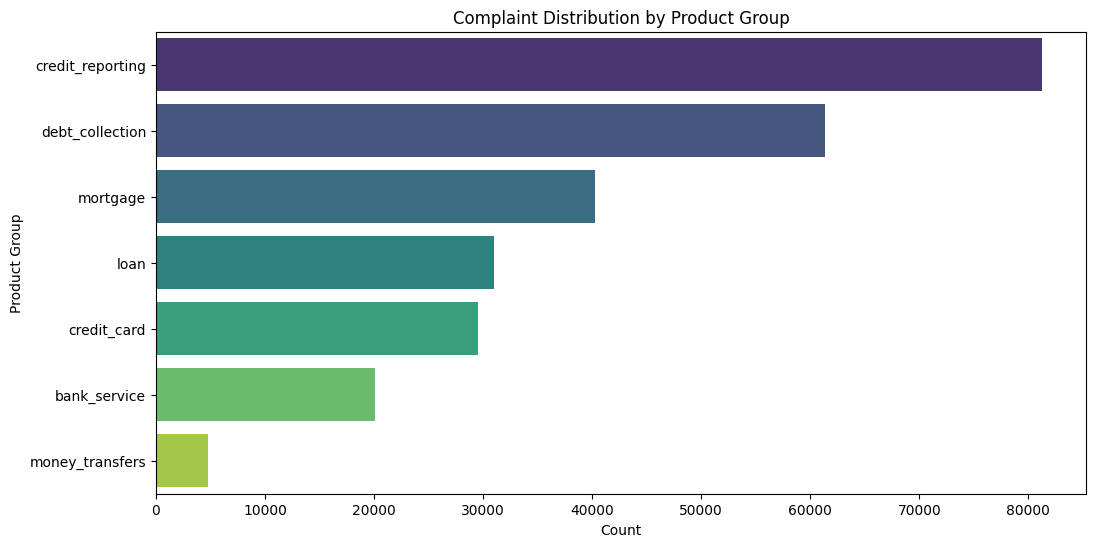

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['product_group'], order=df['product_group'].value_counts().index, palette="viridis")
plt.title("Complaint Distribution by Product Group")
plt.xlabel("Count")
plt.ylabel("Product Group")
plt.show()


### Complaint Length Distribution

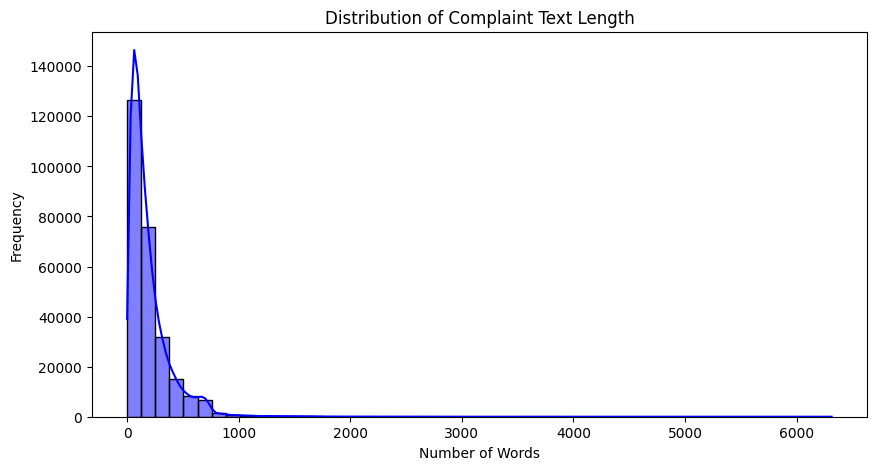

In [10]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))  # Count words in each complaint

plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=50, kde=True, color="blue")
plt.title("Distribution of Complaint Text Length")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


### Check Class Imbalance

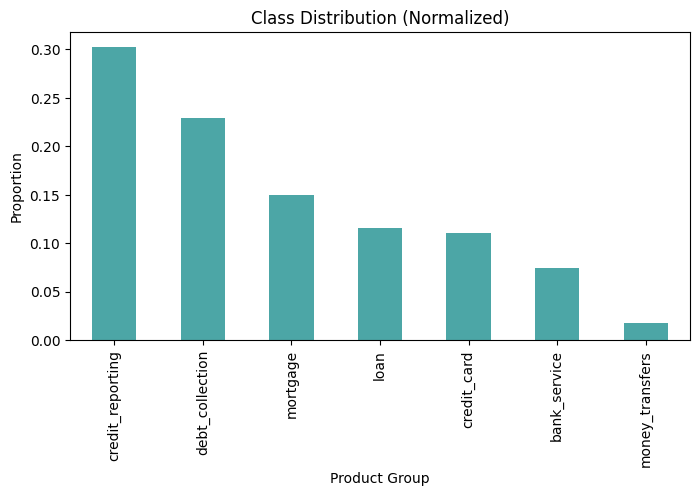

In [11]:
plt.figure(figsize=(8, 4))
df['product_group'].value_counts(normalize=True).plot(kind='bar', color='teal', alpha=0.7)
plt.title("Class Distribution (Normalized)")
plt.ylabel("Proportion")
plt.xlabel("Product Group")
plt.show()
